In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
! pip install --user researchpy

In [3]:
import researchpy # for t-test stuff! 

In [4]:
df = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_IG.csv') 

In [5]:
df.head()

,Date,OAS,Total Return % 1-mo-LOC,Agg Returns,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
0,1997-01-31 00:00:00,0.032073,0.584587,0.517158,0.511626,0.396204,0.523567,0.400107,0.497321,0.463135,0.456587,0.526603,0.411268,0.507779,0.321350,0.437807,0.389493,0.394455,4
1,1997-02-28 00:00:00,0.022910,0.593261,0.509066,0.551748,0.466362,0.494901,0.455225,0.503095,0.605420,0.427400,0.512503,0.411863,0.501391,0.331717,0.463633,0.371790,0.400467,4
2,1997-03-31 00:00:00,0.013746,0.477740,0.317745,0.511322,0.405427,0.457001,0.448342,0.478600,0.528539,0.411794,0.528331,0.420693,0.524060,0.342466,0.418786,0.345951,0.383512,4
3,1997-04-30 00:00:00,0.022910,0.697805,0.685033,0.448404,0.513258,0.478501,0.542739,0.470552,0.588306,0.392140,0.521106,0.431853,0.513958,0.358566,0.445930,0.308511,0.380955,4
4,1997-05-31 00:00:00,0.032073,0.643998,0.607264,0.468161,0.451746,0.516262,0.714240,0.426636,0.569584,0.410815,0.517072,0.440628,0.540596,0.363678,0.441016,0.285278,0.339880,4


In [6]:
df = df.drop(columns=["Total Return % 1-mo-LOC", "Agg Returns" ,
"Excess Return % 1-mo (Treasury)", "Excess Return % 1-mo (Agg)"], axis = 0) # get rid of these useless columns

In [7]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,279.000000,277.000000,277.000000,274.000000,274.000000,270.000000,270.000000,267.000000,267.000000,257.000000,257.000000,245.000000,245.000000,279.00000
mean,0.417782,0.494780,0.503562,0.482637,0.502400,0.492097,0.498393,0.491650,0.504837,0.509006,0.492070,0.501216,0.509136,2.55914
std,0.243309,0.227093,0.207410,0.224126,0.208517,0.216277,0.201213,0.212409,0.208761,0.226952,0.198216,0.196648,0.187849,1.08418
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,0.238259,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,2.00000
50%,0.375716,0.516951,0.505593,0.477463,0.484370,0.501543,0.487557,0.504171,0.498794,0.502269,0.492280,0.526284,0.541649,3.00000
75%,0.542955,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,3.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.00000


# drop outliers that we have identified as 0 and 1s (1 is > upper fence, 0 is < lower fence)

In [8]:
# Getting rid of outliers below. When we ran the script to label outliers, the script
# would label a number an outlier a 1 if it was above the Upper fence and would label
# it a 0 if it was an outlier below the lower fence.
# This script replaces all outliers as "NaN"

df["OAS"] = df["OAS"].replace([0],["NaN"])
df["OAS"] = df["OAS"].replace([1],["Nan"])

df = df.dropna()

df['OAS'] = pd.to_numeric(df['OAS'],errors='coerce') # converting back to float64 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              245 non-null    object 
 1   OAS                               231 non-null    float64
 2   Excess Return % 3-mo (Treasury)   245 non-null    float64
 3   Excess Return % 3-mo (Agg)        245 non-null    float64
 4   Excess Return % 6-mo (Treasury)   245 non-null    float64
 5   Excess Return % 6-mo (Agg)        245 non-null    float64
 6   Excess Return % 9-mo (Treasury)   245 non-null    float64
 7   Excess Return % 9-mo (Agg)        245 non-null    float64
 8   Excess Return % 12-mo (Treasury)  245 non-null    float64
 9   Excess Return % 12-mo (Agg)       245 non-null    float64
 10  Excess Return % 24-mo (Treasury)  245 non-null    float64
 11  Excess Return % 24-mo (Agg)       245 non-null    float64
 12  Excess R

# Now lets select all OAS levels and their coresponding excess returns that are above the 75th percentile (top 25%)

In [9]:
# Select * 
# From OAS
# Where OAS >= 75th percentile
## SQL version above ## 
highspread = df["OAS"].quantile(.75) # every data point over the 75th percentile
print(highspread)

# pandas version of the SQL function 
df = df[(df['OAS'] > highspread)]

0.5383734250000001


In [10]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,0.689576,0.534697,0.576690,0.556222,0.593430,0.575207,0.585405,0.572485,0.596531,0.649506,0.621833,0.636887,0.647727,2.413793
std,0.121905,0.298628,0.250328,0.270376,0.257120,0.253373,0.250454,0.246948,0.255936,0.191476,0.126105,0.073239,0.067866,1.108729
min,0.540664,0.000000,0.025155,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.264213,0.305579,0.439550,0.509455,1.000000
25%,0.587629,0.310605,0.415476,0.392256,0.452046,0.512871,0.522391,0.517741,0.506534,0.480269,0.542208,0.583540,0.610398,1.000000
50%,0.664376,0.595094,0.594174,0.615902,0.634622,0.630077,0.645372,0.636972,0.670735,0.625143,0.650613,0.637395,0.643328,3.000000
75%,0.776632,0.710653,0.728272,0.755391,0.767751,0.746188,0.742360,0.746194,0.774971,0.813682,0.699814,0.683217,0.693032,3.000000
max,0.966781,1.000000,1.000000,1.000000,1.000000,0.915222,0.907077,0.874431,0.938608,0.998973,0.876645,0.810577,0.805064,4.000000


In [11]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   58.0  0.689576  0.121905  0.016007   
 1  Excess Return % 3-mo (Treasury)   58.0  0.534697  0.298628  0.039212   
 2                         combined  116.0  0.612136  0.240035  0.022287   
 
    95% Conf.  Interval  
 0   0.657523  0.721629  
 1   0.456176  0.613217  
 2   0.567991  0.656282  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...    0.1549
 1                              Degrees of freedom =   114.0000
 2                                               t =     3.6569
 3                           Two side test p value =     0.0004
 4                          Difference < 0 p value =     0.9998
 5                          Difference > 0 p value =     0.0002
 6                                       Cohen's d =     0.6791
 7                                       Hedge's g =     0.6746
 8           

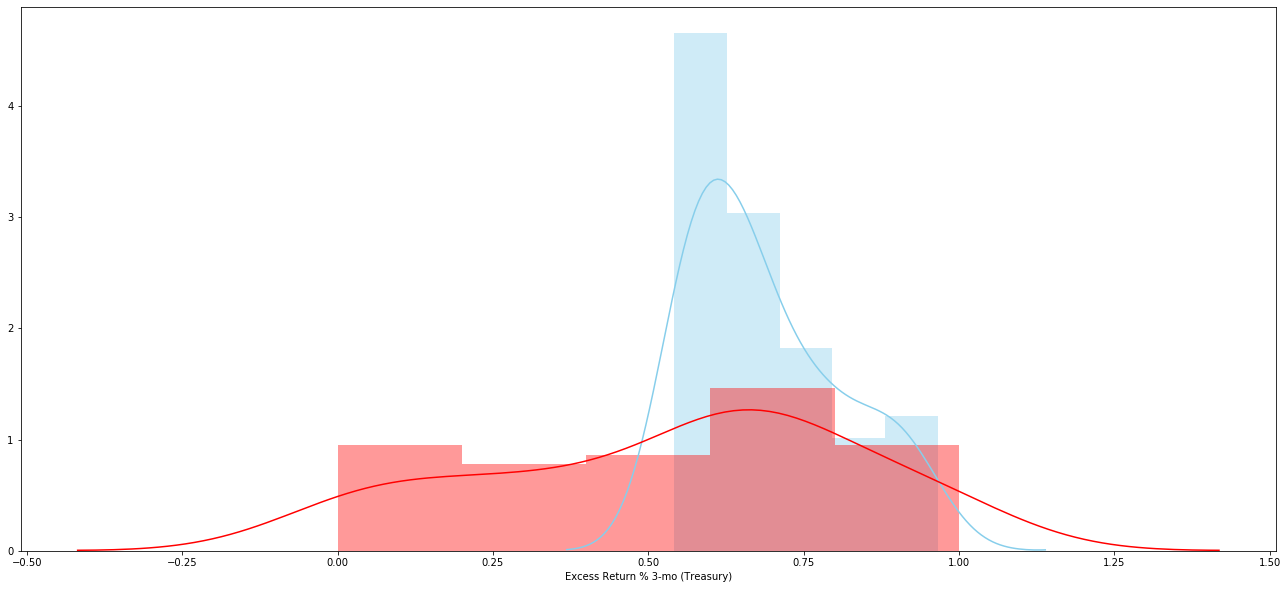

In [12]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [13]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   58.0  0.689576  0.121905  0.016007   0.657523   
 1  Excess Return % 3-mo (Agg)   58.0  0.576690  0.250328  0.032870   0.510870   
 2                    combined  116.0  0.633133  0.204056  0.018946   0.595604   
 
    Interval  
 0  0.721629  
 1  0.642510  
 2  0.670662  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =     0.1129
 1                             Degrees of freedom =   114.0000
 2                                              t =     3.0877
 3                          Two side test p value =     0.0025
 4                         Difference < 0 p value =     0.9987
 5                         Difference > 0 p value =     0.0013
 6                                      Cohen's d =     0.5734
 7                                      Hedge's g =     0.5696
 8                                  Glass'

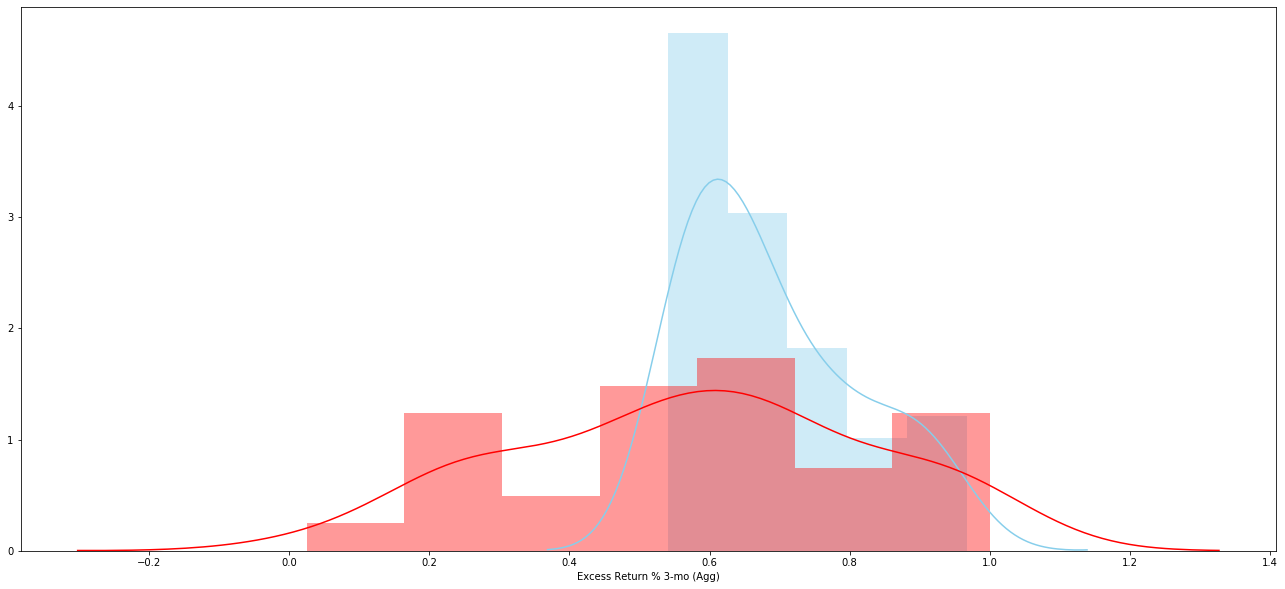

In [14]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [15]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   58.0  0.689576  0.121905  0.016007   
 1  Excess Return % 6-mo (Treasury)   58.0  0.556222  0.270376  0.035502   
 2                         combined  116.0  0.622899  0.219280  0.020360   
 
    95% Conf.  Interval  
 0   0.657523  0.721629  
 1   0.485131  0.627314  
 2   0.582571  0.663228  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...    0.1334
 1                              Degrees of freedom =   114.0000
 2                                               t =     3.4243
 3                           Two side test p value =     0.0009
 4                          Difference < 0 p value =     0.9996
 5                          Difference > 0 p value =     0.0004
 6                                       Cohen's d =     0.6359
 7                                       Hedge's g =     0.6317
 8           

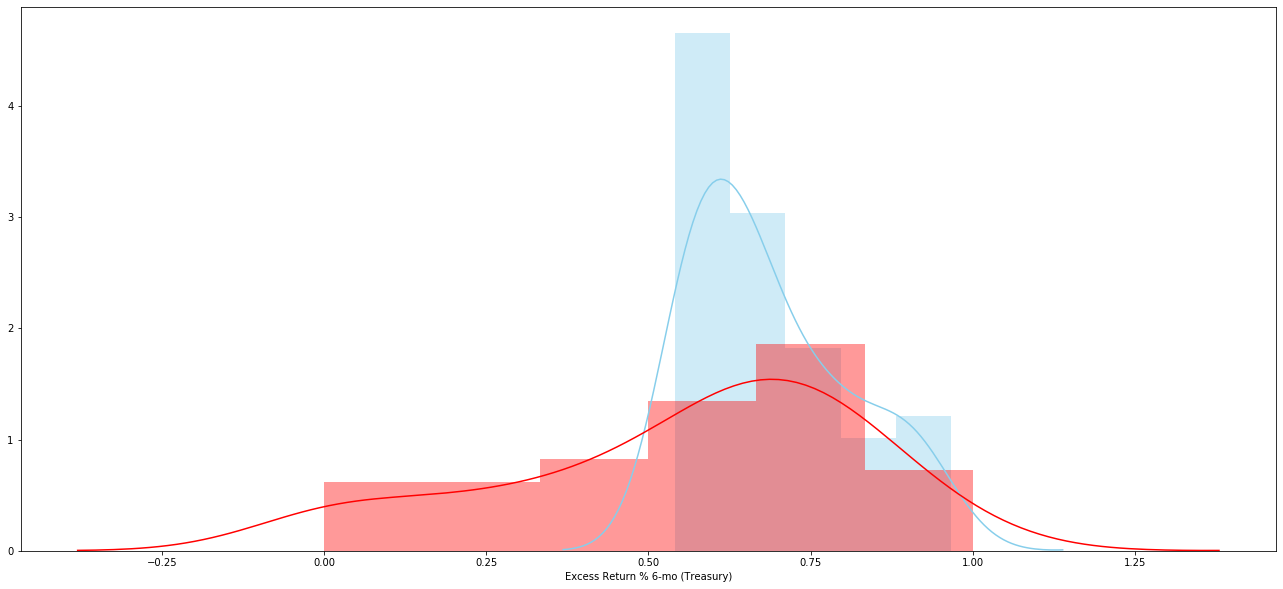

In [16]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [17]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   58.0  0.689576  0.121905  0.016007   0.657523   
 1  Excess Return % 6-mo (Agg)   58.0  0.593430  0.257120  0.033761   0.525824   
 2                    combined  116.0  0.641503  0.206070  0.019133   0.603604   
 
    Interval  
 0  0.721629  
 1  0.661036  
 2  0.679402  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =     0.0961
 1                             Degrees of freedom =   114.0000
 2                                              t =     2.5732
 3                          Two side test p value =     0.0114
 4                         Difference < 0 p value =     0.9943
 5                         Difference > 0 p value =     0.0057
 6                                      Cohen's d =     0.4778
 7                                      Hedge's g =     0.4747
 8                                  Glass'

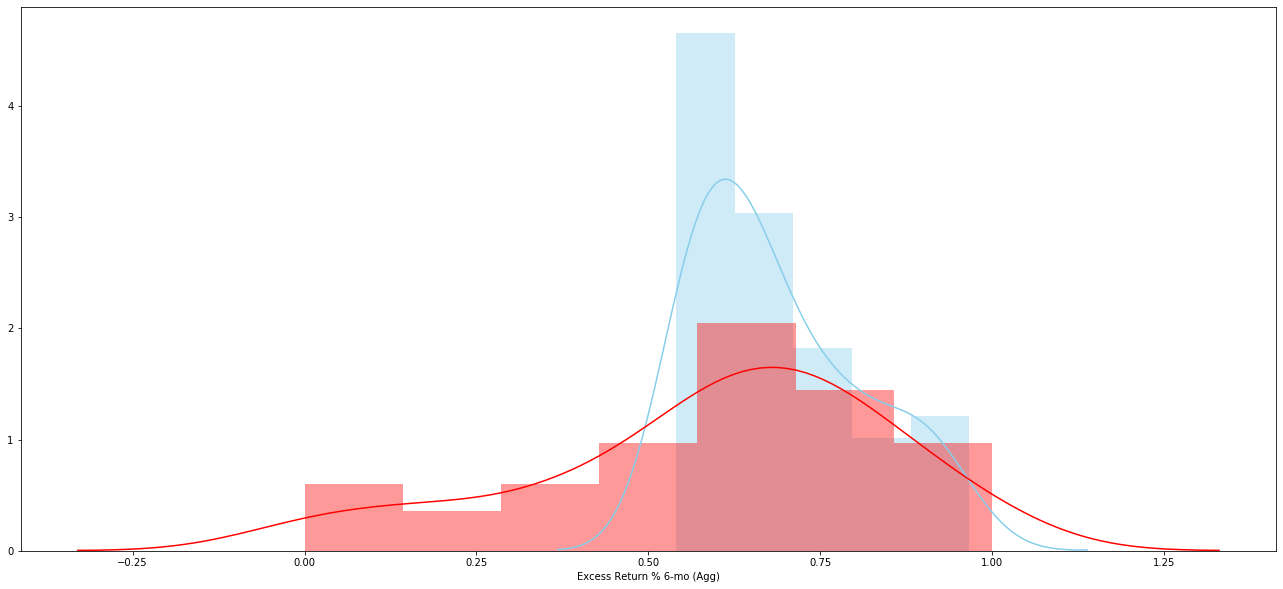

In [18]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [19]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   58.0  0.689576  0.121905  0.016007   
 1  Excess Return % 9-mo (Treasury)   58.0  0.575207  0.253373  0.033270   
 2                         combined  116.0  0.632392  0.206117  0.019137   
 
    95% Conf.  Interval  
 0   0.657523  0.721629  
 1   0.508586  0.641829  
 2   0.594484  0.670299  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...    0.1144
 1                              Degrees of freedom =   114.0000
 2                                               t =     3.0977
 3                           Two side test p value =     0.0025
 4                          Difference < 0 p value =     0.9988
 5                          Difference > 0 p value =     0.0012
 6                                       Cohen's d =     0.5752
 7                                       Hedge's g =     0.5714
 8           

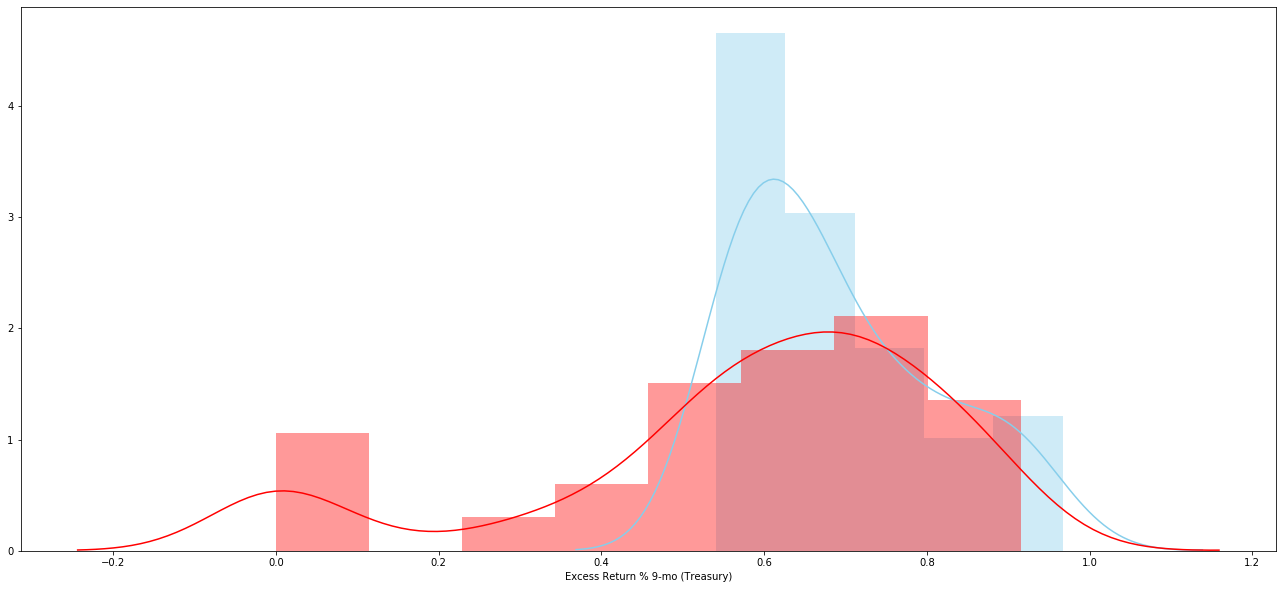

In [20]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [21]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   58.0  0.689576  0.121905  0.016007   0.657523   
 1  Excess Return % 9-mo (Agg)   58.0  0.585405  0.250454  0.032886   0.519552   
 2                    combined  116.0  0.637491  0.202961  0.018844   0.600163   
 
    Interval  
 0  0.721629  
 1  0.651258  
 2  0.674818  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =     0.1042
 1                             Degrees of freedom =   114.0000
 2                                              t =     2.8482
 3                          Two side test p value =     0.0052
 4                         Difference < 0 p value =     0.9974
 5                         Difference > 0 p value =     0.0026
 6                                      Cohen's d =     0.5289
 7                                      Hedge's g =     0.5254
 8                                  Glass'

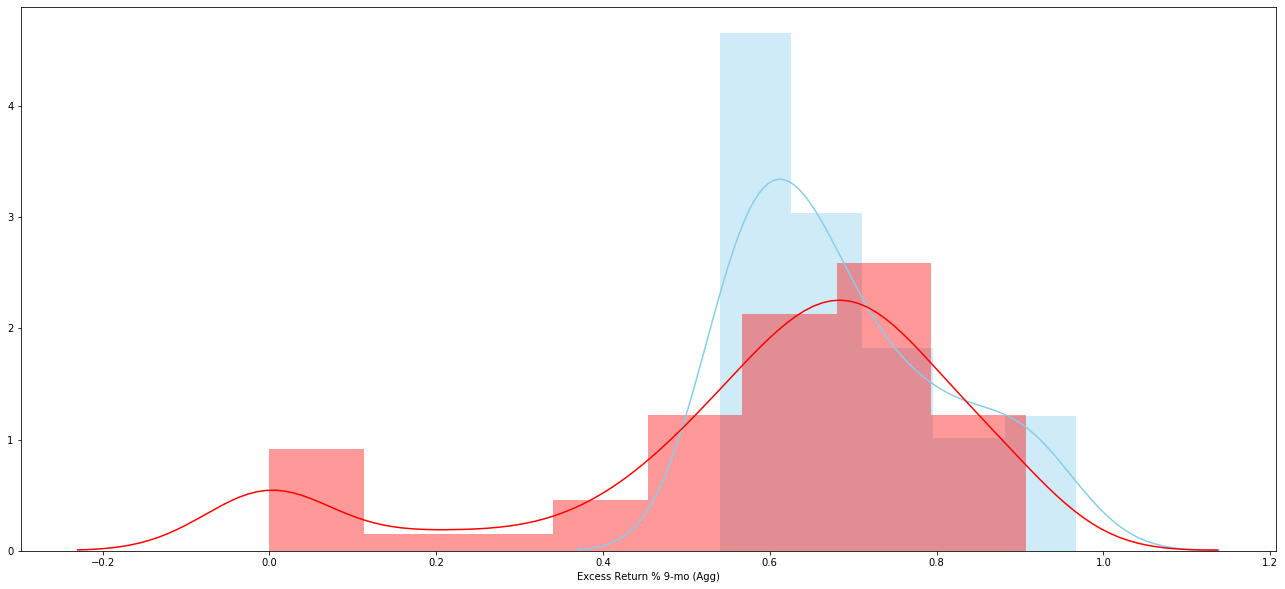

In [22]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [23]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   58.0  0.689576  0.121905  0.016007   
 1  Excess Return % 12-mo (Treasury)   58.0  0.572485  0.246948  0.032426   
 2                          combined  116.0  0.631030  0.202607  0.018812   
 
    95% Conf.  Interval  
 0   0.657523  0.721629  
 1   0.507553  0.637416  
 2   0.593768  0.668293  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Treas...    0.1171
 1                              Degrees of freedom =   114.0000
 2                                               t =     3.2380
 3                           Two side test p value =     0.0016
 4                          Difference < 0 p value =     0.9992
 5                          Difference > 0 p value =     0.0008
 6                                       Cohen's d =     0.6013
 7                                       Hedge's g =     0.5973
 8       

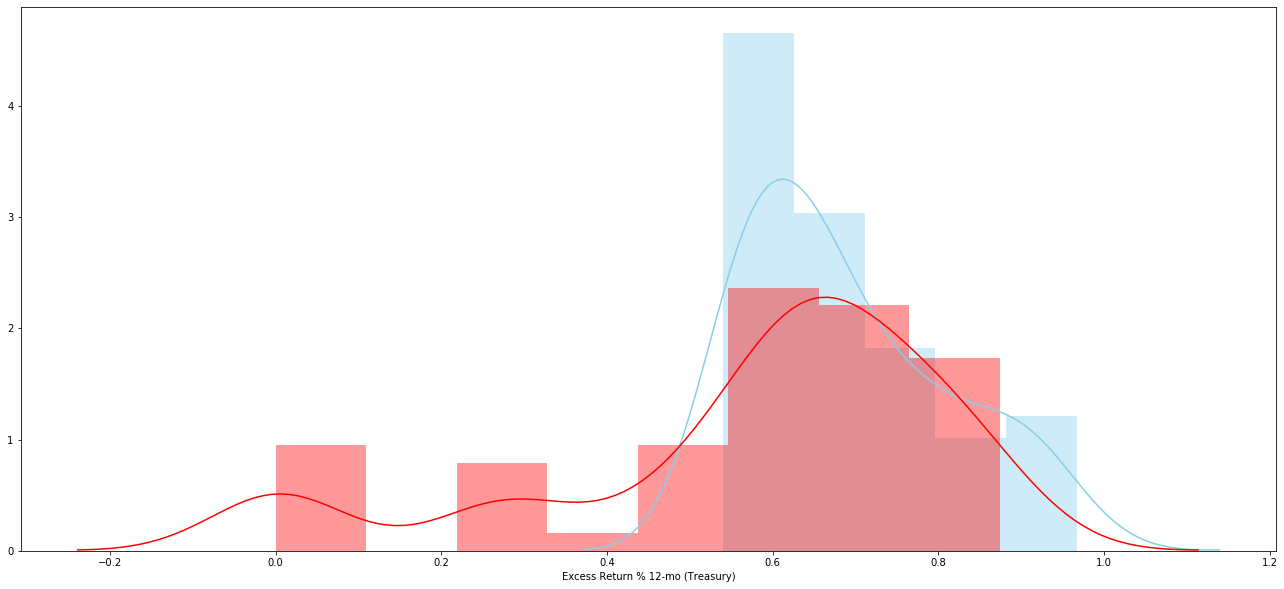

In [24]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [25]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   58.0  0.689576  0.121905  0.016007   
 1  Excess Return % 12-mo (Agg)   58.0  0.596531  0.255936  0.033606   
 2                     combined  116.0  0.643054  0.204978  0.019032   
 
    95% Conf.  Interval  
 0   0.657523  0.721629  
 1   0.529236  0.663826  
 2   0.605355  0.680752  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =     0.0930
 1                              Degrees of freedom =   114.0000
 2                                               t =     2.4996
 3                           Two side test p value =     0.0139
 4                          Difference < 0 p value =     0.9931
 5                          Difference > 0 p value =     0.0069
 6                                       Cohen's d =     0.4642
 7                                       Hedge's g =     0.4611
 8                           

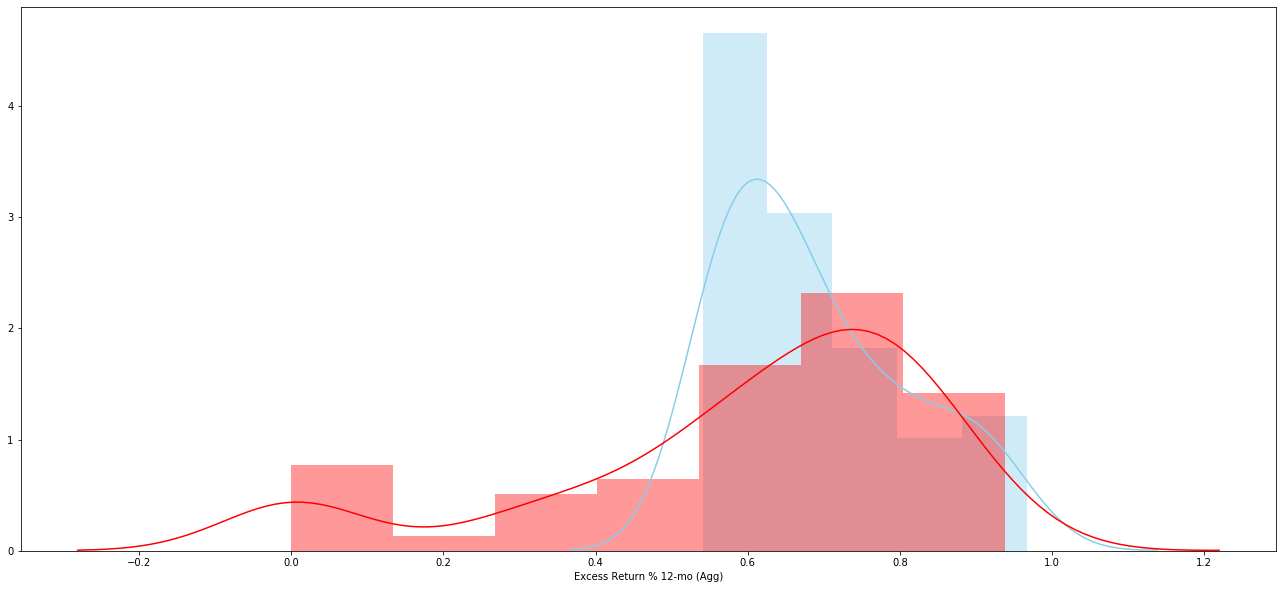

In [26]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [27]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   58.0  0.689576  0.121905  0.016007   
 1  Excess Return % 24-mo (Treasury)   58.0  0.649506  0.191476  0.025142   
 2                          combined  116.0  0.669541  0.161068  0.014955   
 
    95% Conf.  Interval  
 0   0.657523  0.721629  
 1   0.599160  0.699852  
 2   0.639919  0.699164  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Treas...    0.0401
 1                              Degrees of freedom =   114.0000
 2                                               t =     1.3444
 3                           Two side test p value =     0.1815
 4                          Difference < 0 p value =     0.9093
 5                          Difference > 0 p value =     0.0907
 6                                       Cohen's d =     0.2496
 7                                       Hedge's g =     0.2480
 8       

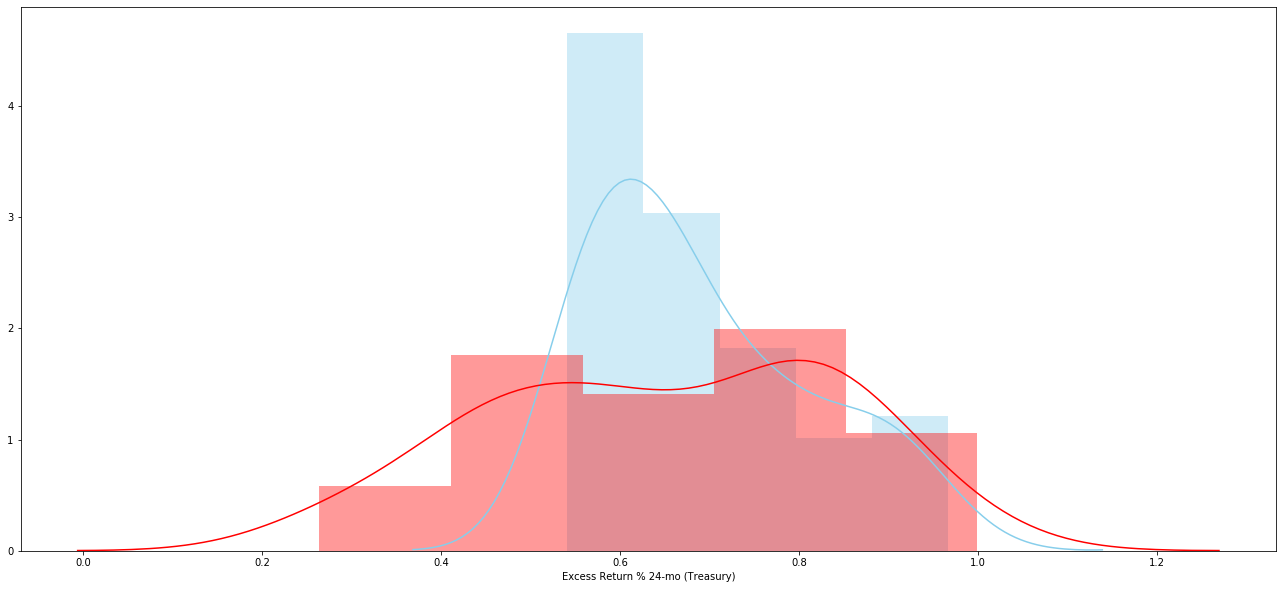

In [28]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [29]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   58.0  0.689576  0.121905  0.016007   
 1  Excess Return % 24-mo (Agg)   58.0  0.621833  0.126105  0.016558   
 2                     combined  116.0  0.655704  0.128083  0.011892   
 
    95% Conf.  Interval  
 0   0.657523  0.721629  
 1   0.588675  0.654990  
 2   0.632148  0.679260  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =     0.0677
 1                              Degrees of freedom =   114.0000
 2                                               t =     2.9415
 3                           Two side test p value =     0.0040
 4                          Difference < 0 p value =     0.9980
 5                          Difference > 0 p value =     0.0020
 6                                       Cohen's d =     0.5462
 7                                       Hedge's g =     0.5426
 8                           

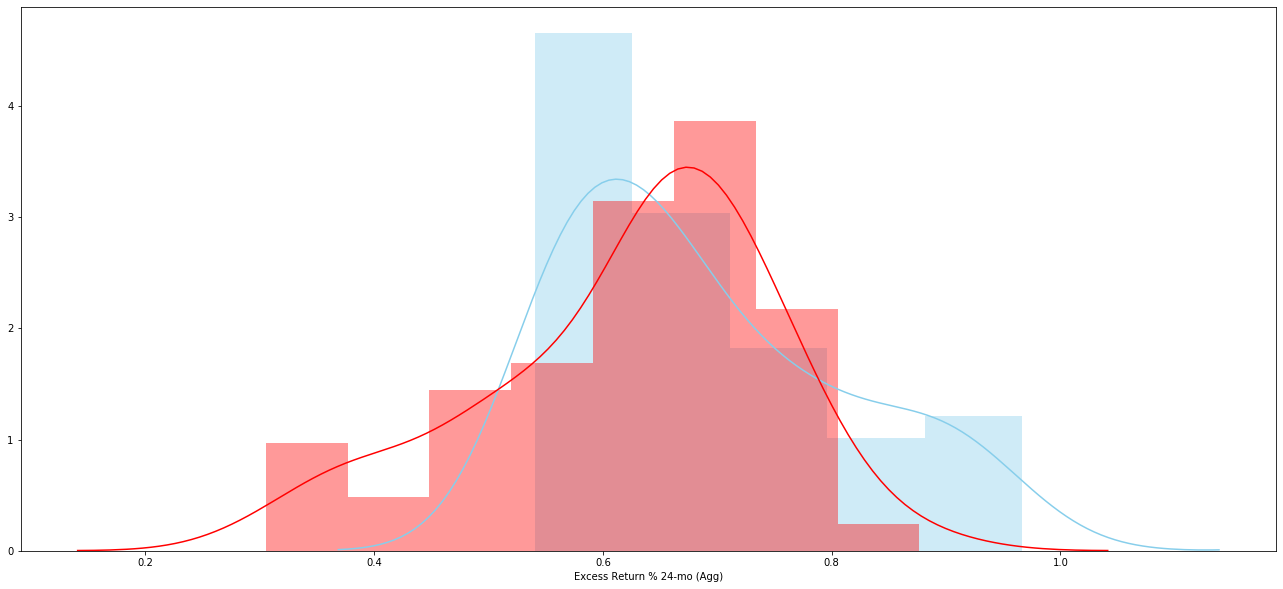

In [30]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [31]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   58.0  0.689576  0.121905  0.016007   
 1  Excess Return % 36-mo (Treasury)   58.0  0.636887  0.073239  0.009617   
 2                          combined  116.0  0.663231  0.103560  0.009615   
 
    95% Conf.  Interval  
 0   0.657523  0.721629  
 1   0.617629  0.656144  
 2   0.644185  0.682277  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Treas...    0.0527
 1                              Degrees of freedom =   114.0000
 2                                               t =     2.8216
 3                           Two side test p value =     0.0056
 4                          Difference < 0 p value =     0.9972
 5                          Difference > 0 p value =     0.0028
 6                                       Cohen's d =     0.5240
 7                                       Hedge's g =     0.5205
 8       

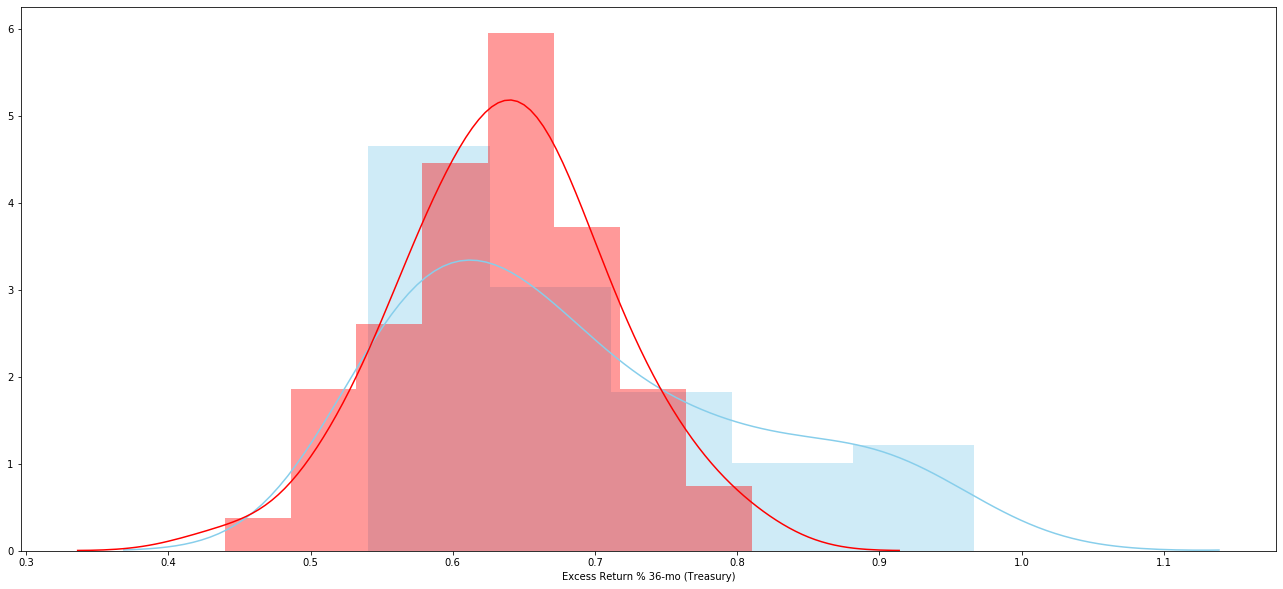

In [32]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [33]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   58.0  0.689576  0.121905  0.016007   
 1  Excess Return % 36-mo (Agg)   58.0  0.647727  0.067866  0.008911   
 2                     combined  116.0  0.668652  0.100451  0.009327   
 
    95% Conf.  Interval  
 0   0.657523  0.721629  
 1   0.629883  0.665572  
 2   0.650178  0.687126  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =     0.0418
 1                              Degrees of freedom =   114.0000
 2                                               t =     2.2843
 3                           Two side test p value =     0.0242
 4                          Difference < 0 p value =     0.9879
 5                          Difference > 0 p value =     0.0121
 6                                       Cohen's d =     0.4242
 7                                       Hedge's g =     0.4214
 8                           

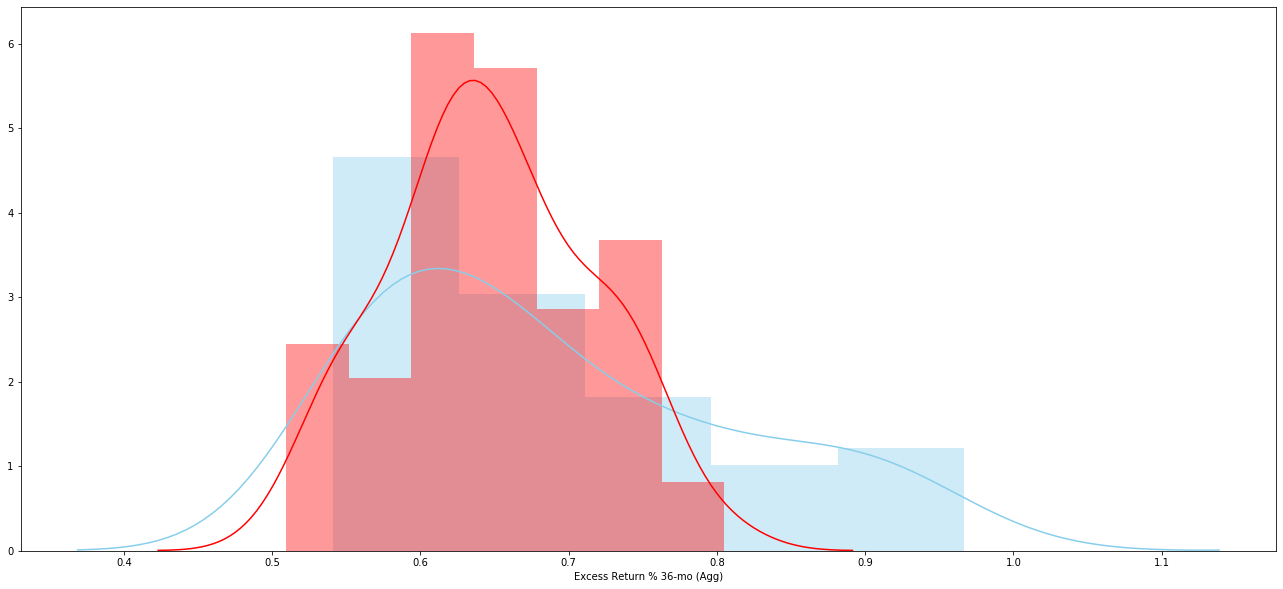

In [34]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")

# Now lets run the same t-test but with High spreads to all returns

In [35]:
df1 = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_IG.csv') 

In [36]:
df1.describe()

,OAS,Total Return % 1-mo-LOC,Agg Returns,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,279.000000,279.000000,279.000000,279.000000,279.000000,277.000000,277.000000,274.000000,274.000000,270.000000,270.000000,267.000000,267.000000,257.000000,257.000000,245.000000,245.000000,279.00000
mean,0.417782,0.610519,0.534440,0.504132,0.499413,0.494780,0.503562,0.482637,0.502400,0.492097,0.498393,0.491650,0.504837,0.509006,0.492070,0.501216,0.509136,2.55914
std,0.243309,0.118164,0.137960,0.243397,0.228002,0.227093,0.207410,0.224126,0.208517,0.216277,0.201213,0.212409,0.208761,0.226952,0.198216,0.196648,0.187849,1.08418
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,0.238259,0.555074,0.456258,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,2.00000
50%,0.375716,0.614830,0.539434,0.521049,0.502388,0.516951,0.505593,0.477463,0.484370,0.501543,0.487557,0.504171,0.498794,0.502269,0.492280,0.526284,0.541649,3.00000
75%,0.542955,0.673396,0.622920,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,3.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.00000


In [37]:
des, res = researchpy.ttest(df['OAS'], 
df1['Excess Return % 3-mo (Treasury)']) # notice we are using the High Spread Data for OAS

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   58.0  0.689576  0.121905  0.016007   
 1  Excess Return % 3-mo (Treasury)  277.0  0.494780  0.227093  0.013645   
 2                         combined  335.0  0.528506  0.224945  0.012290   
 
    95% Conf.  Interval  
 0   0.657523  0.721629  
 1   0.467919  0.521641  
 2   0.504330  0.552682  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...    0.1948
 1                              Degrees of freedom =   333.0000
 2                                               t =     6.3390
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.9154
 7                                       Hedge's g =     0.9133
 8           

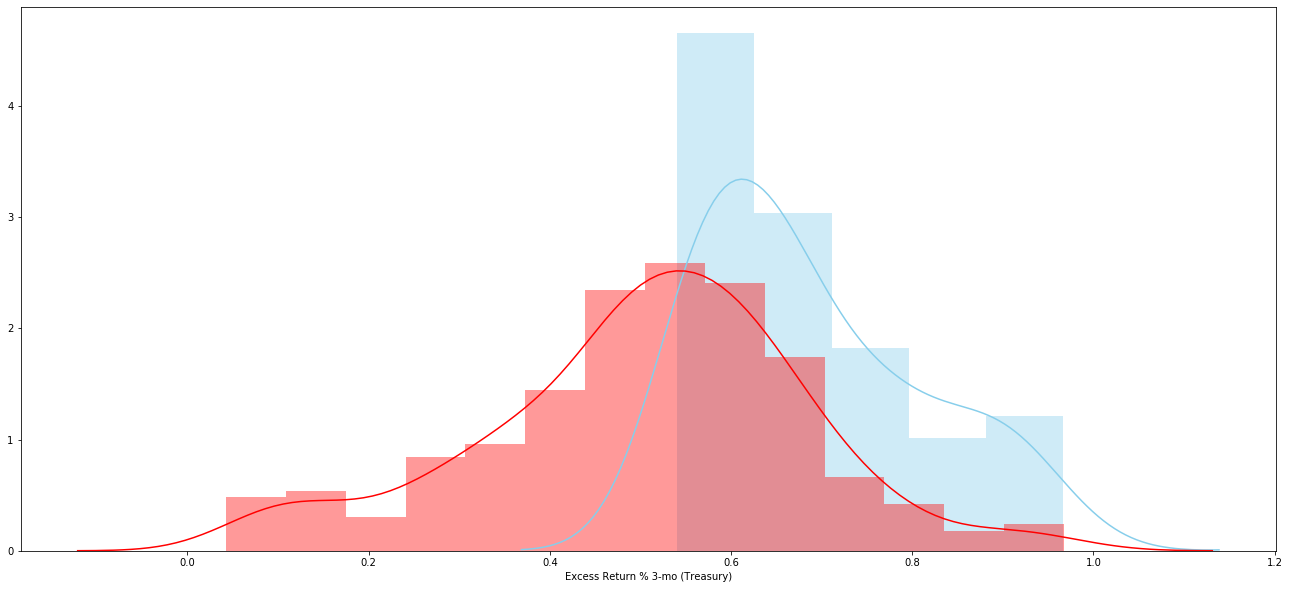

In [38]:
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [39]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   58.0  0.689576  0.121905  0.016007   0.657523   
 1  Excess Return % 3-mo (Agg)  277.0  0.503562  0.207410  0.012462   0.479029   
 2                    combined  335.0  0.535767  0.207492  0.011337   0.513467   
 
    Interval  
 0  0.721629  
 1  0.528095  
 2  0.558067  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =     0.1860
 1                             Degrees of freedom =   333.0000
 2                                              t =     6.5910
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     0.9517
 7                                      Hedge's g =     0.9496
 8                                  Glass'

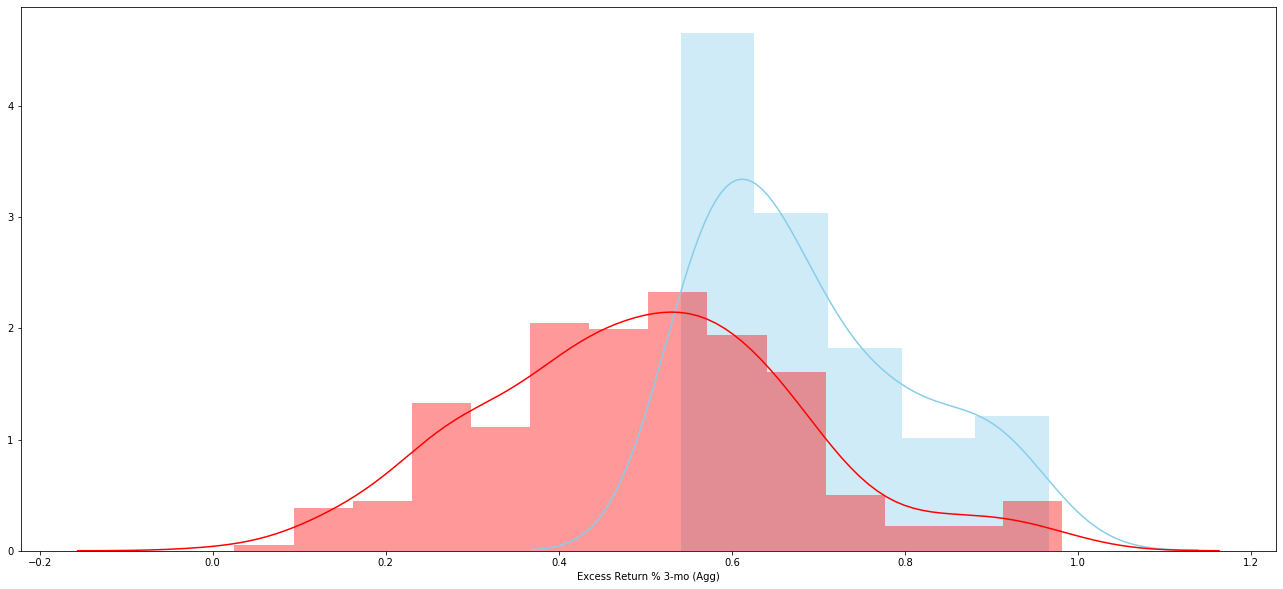

In [40]:
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [41]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   58.0  0.689576  0.121905  0.016007   
 1  Excess Return % 6-mo (Treasury)  274.0  0.482637  0.224126  0.013540   
 2                         combined  332.0  0.518789  0.224014  0.012294   
 
    95% Conf.  Interval  
 0   0.657523  0.721629  
 1   0.455981  0.509293  
 2   0.494604  0.542974  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...    0.2069
 1                              Degrees of freedom =   330.0000
 2                                               t =     6.8160
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.9852
 7                                       Hedge's g =     0.9829
 8           

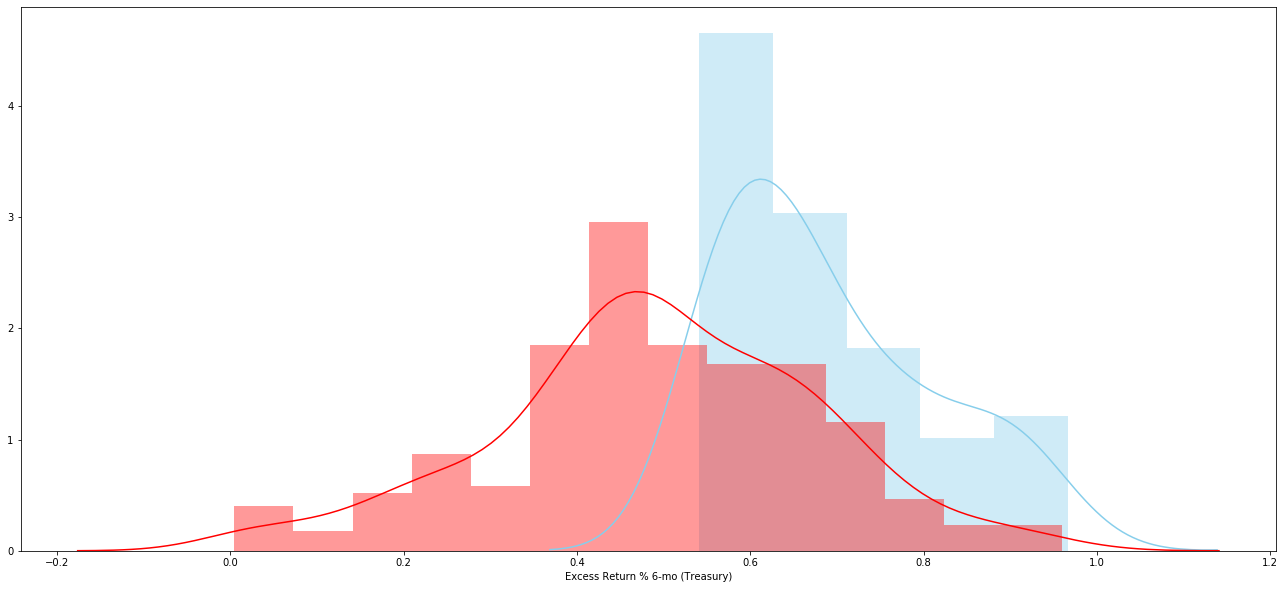

In [42]:
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [43]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   58.0  0.689576  0.121905  0.016007   0.657523   
 1  Excess Return % 6-mo (Agg)  274.0  0.502400  0.208517  0.012597   0.477601   
 2                    combined  332.0  0.535100  0.208533  0.011445   0.512586   
 
    Interval  
 0  0.721629  
 1  0.527200  
 2  0.557613  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =     0.1872
 1                             Degrees of freedom =   330.0000
 2                                              t =     6.5968
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     0.9535
 7                                      Hedge's g =     0.9513
 8                                  Glass'

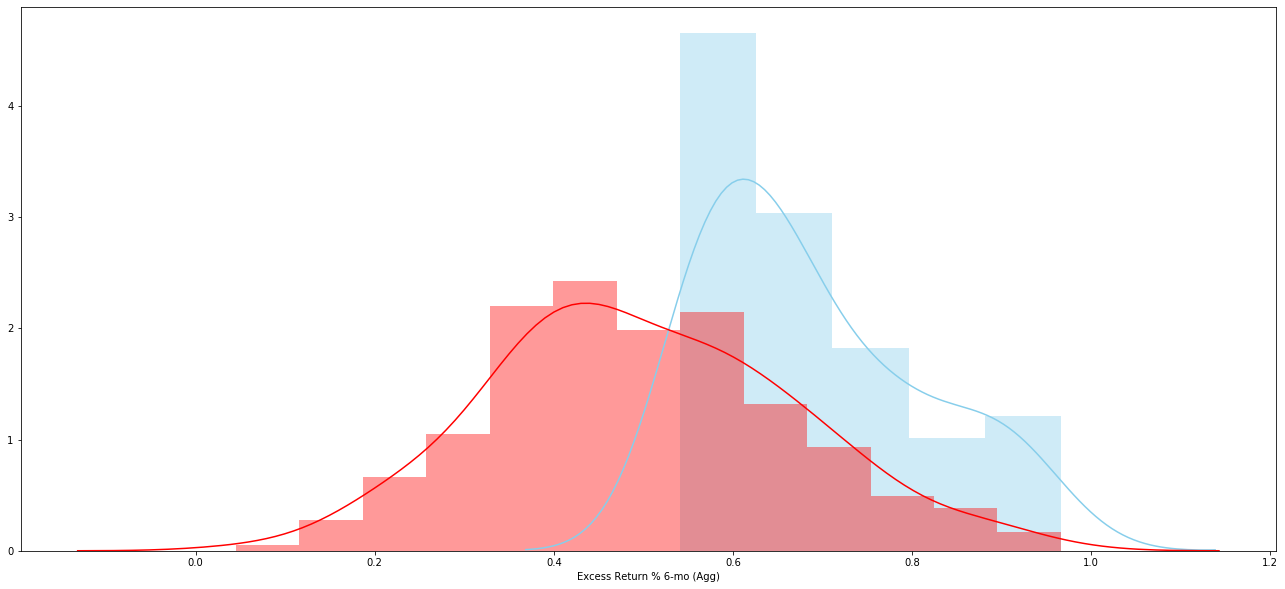

In [44]:
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [45]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   58.0  0.689576  0.121905  0.016007   
 1  Excess Return % 9-mo (Treasury)  270.0  0.492097  0.216277  0.013162   
 2                         combined  328.0  0.527017  0.216249  0.011940   
 
    95% Conf.  Interval  
 0   0.657523  0.721629  
 1   0.466183  0.518011  
 2   0.503528  0.550507  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...    0.1975
 1                              Degrees of freedom =   326.0000
 2                                               t =     6.7229
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.9730
 7                                       Hedge's g =     0.9707
 8           

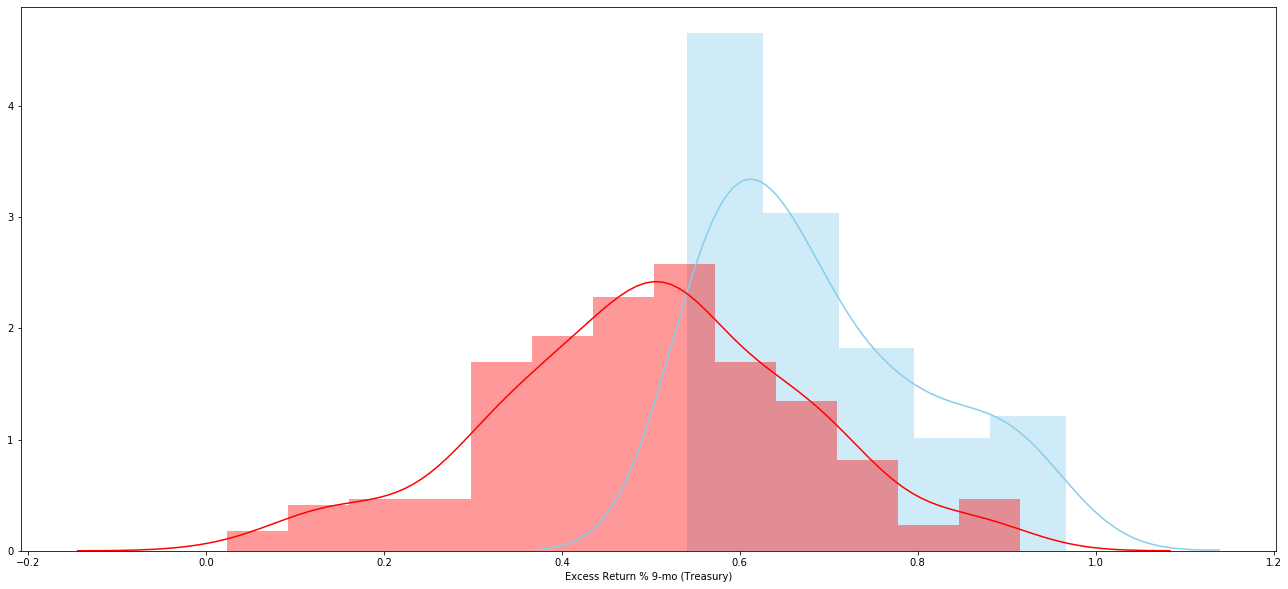

In [46]:
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [47]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   58.0  0.689576  0.121905  0.016007   0.657523   
 1  Excess Return % 9-mo (Agg)  270.0  0.498393  0.201213  0.012245   0.474284   
 2                    combined  328.0  0.532200  0.203058  0.011212   0.510143   
 
    Interval  
 0  0.721629  
 1  0.522502  
 2  0.554256  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =     0.1912
 1                             Degrees of freedom =   326.0000
 2                                              t =     6.9618
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.0075
 7                                      Hedge's g =     1.0052
 8                                  Glass'

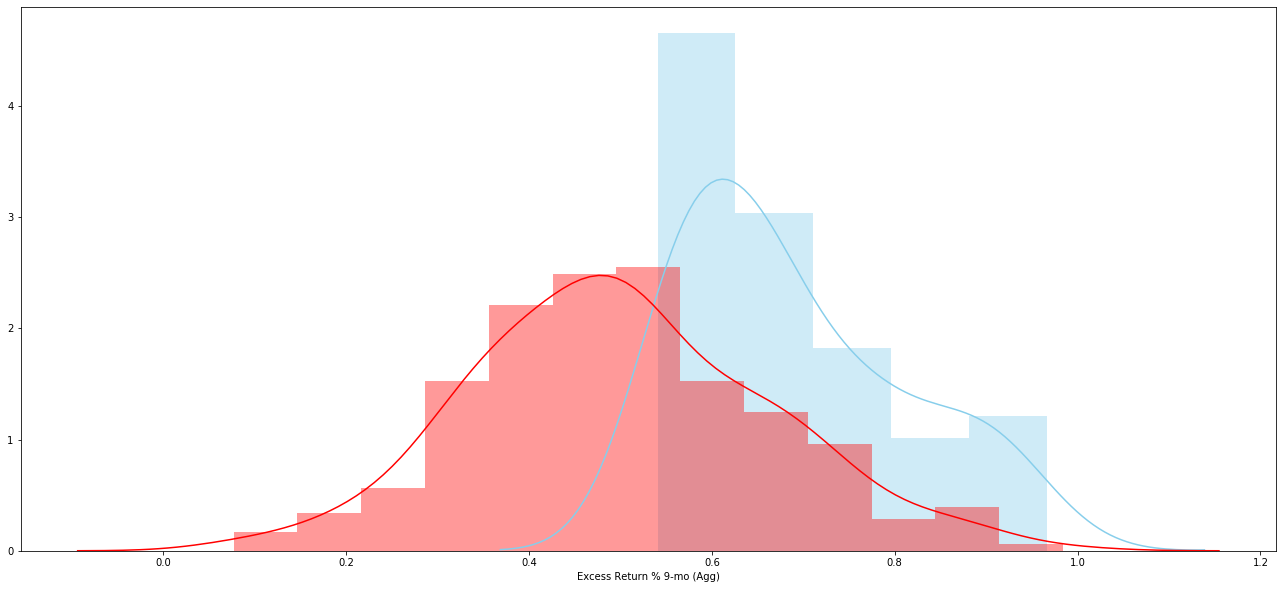

In [48]:
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [49]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   58.0  0.689576  0.121905  0.016007   
 1  Excess Return % 12-mo (Treasury)  267.0  0.491650  0.212409  0.012999   
 2                          combined  325.0  0.526972  0.213112  0.011821   
 
    95% Conf.  Interval  
 0   0.657523  0.721629  
 1   0.466056  0.517245  
 2   0.503716  0.550229  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Treas...    0.1979
 1                              Degrees of freedom =   323.0000
 2                                               t =     6.8503
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.9924
 7                                       Hedge's g =     0.9901
 8       

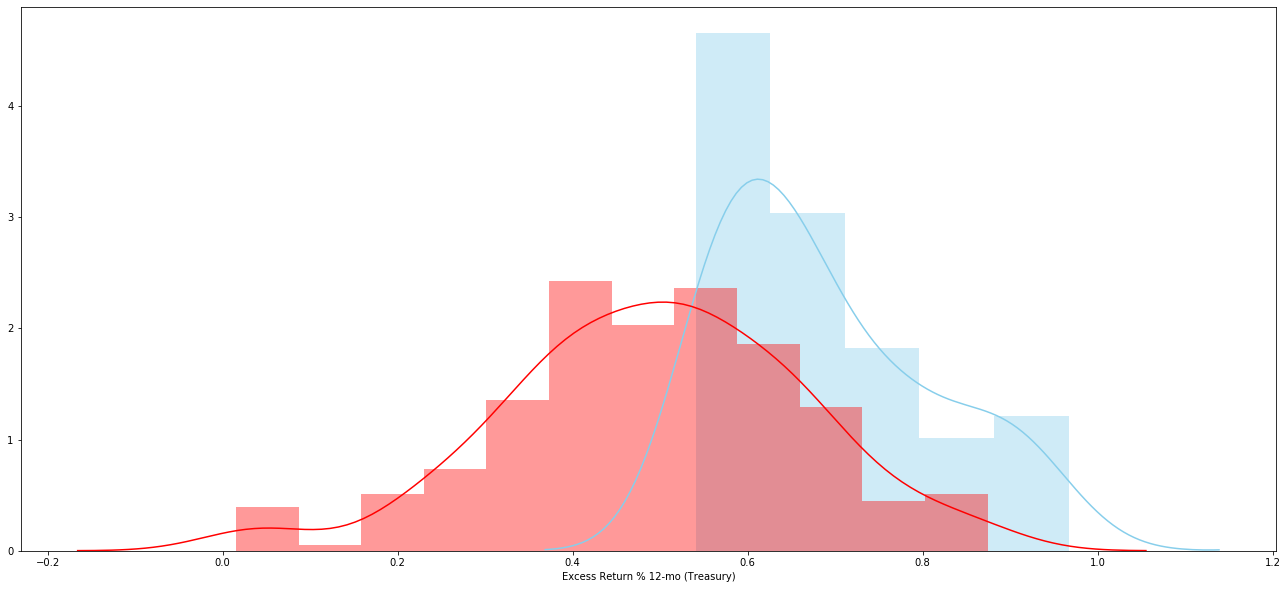

In [50]:
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([1],["NaN"])
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [51]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   58.0  0.689576  0.121905  0.016007   
 1  Excess Return % 12-mo (Agg)  267.0  0.504837  0.208761  0.012776   
 2                     combined  325.0  0.537806  0.208358  0.011558   
 
    95% Conf.  Interval  
 0   0.657523  0.721629  
 1   0.479682  0.529992  
 2   0.515069  0.560544  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =     0.1847
 1                              Degrees of freedom =   323.0000
 2                                               t =     6.4981
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.9414
 7                                       Hedge's g =     0.9392
 8                           

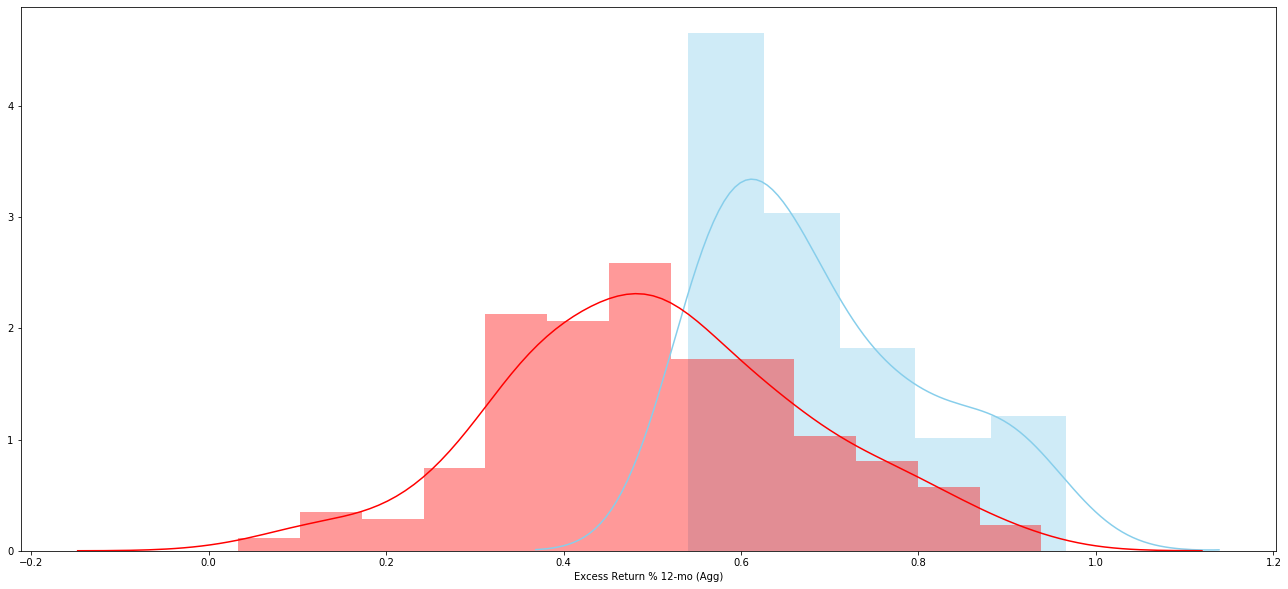

In [52]:
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [53]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   58.0  0.689576  0.121905  0.016007   
 1  Excess Return % 24-mo (Treasury)  257.0  0.509006  0.226952  0.014157   
 2                          combined  315.0  0.542254  0.222721  0.012549   
 
    95% Conf.  Interval  
 0   0.657523  0.721629  
 1   0.481127  0.536885  
 2   0.517563  0.566945  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Treas...    0.1806
 1                              Degrees of freedom =   313.0000
 2                                               t =     5.8664
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.8528
 7                                       Hedge's g =     0.8507
 8       

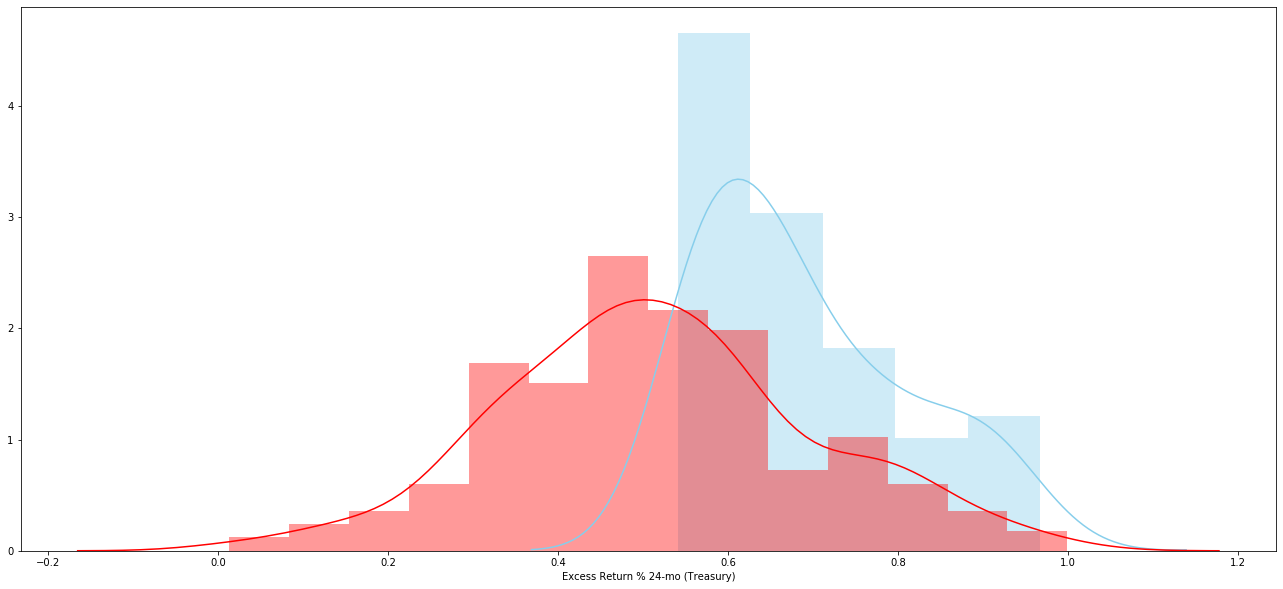

In [54]:
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [55]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   58.0  0.689576  0.121905  0.016007   
 1  Excess Return % 24-mo (Agg)  257.0  0.492070  0.198216  0.012364   
 2                     combined  315.0  0.528436  0.201516  0.011354   
 
    95% Conf.  Interval  
 0   0.657523  0.721629  
 1   0.467721  0.516419  
 2   0.506097  0.550776  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =     0.1975
 1                              Degrees of freedom =   313.0000
 2                                               t =     7.2788
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.0581
 7                                       Hedge's g =     1.0556
 8                           

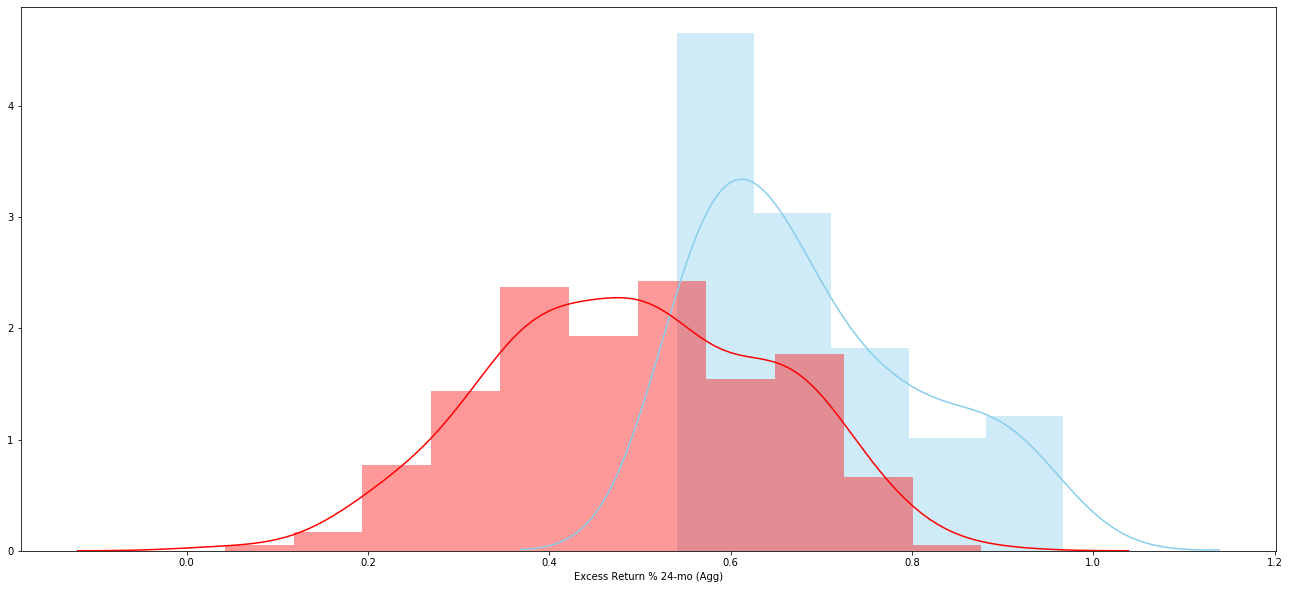

In [56]:
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [57]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   58.0  0.689576  0.121905  0.016007   
 1  Excess Return % 36-mo (Treasury)  245.0  0.501216  0.196648  0.012563   
 2                          combined  303.0  0.537272  0.198892  0.011426   
 
    95% Conf.  Interval  
 0   0.657523  0.721629  
 1   0.476470  0.525962  
 2   0.514787  0.559757  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Treas...    0.1884
 1                              Degrees of freedom =   301.0000
 2                                               t =     6.9790
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.0191
 7                                       Hedge's g =     1.0166
 8       

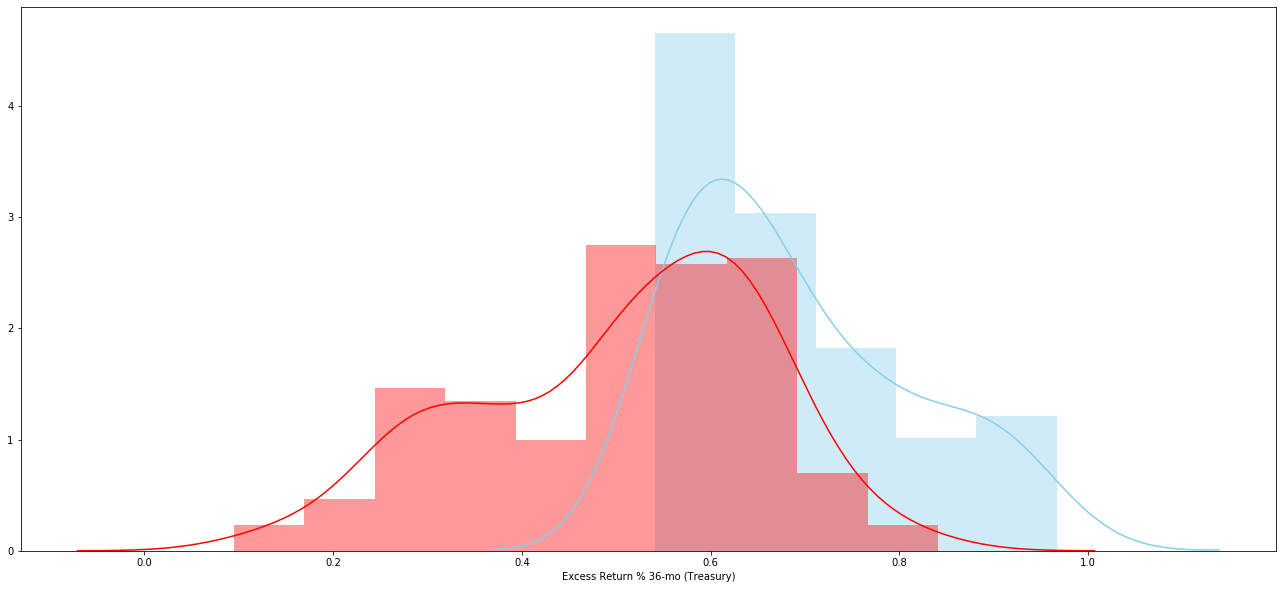

In [58]:
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([1],["NaN"])
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [59]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   58.0  0.689576  0.121905  0.016007   
 1  Excess Return % 36-mo (Agg)  245.0  0.509136  0.187849  0.012001   
 2                     combined  303.0  0.543676  0.190712  0.010956   
 
    95% Conf.  Interval  
 0   0.657523  0.721629  
 1   0.485497  0.532775  
 2   0.522116  0.565236  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =     0.1804
 1                              Degrees of freedom =   301.0000
 2                                               t =     6.9713
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.0180
 7                                       Hedge's g =     1.0154
 8                           

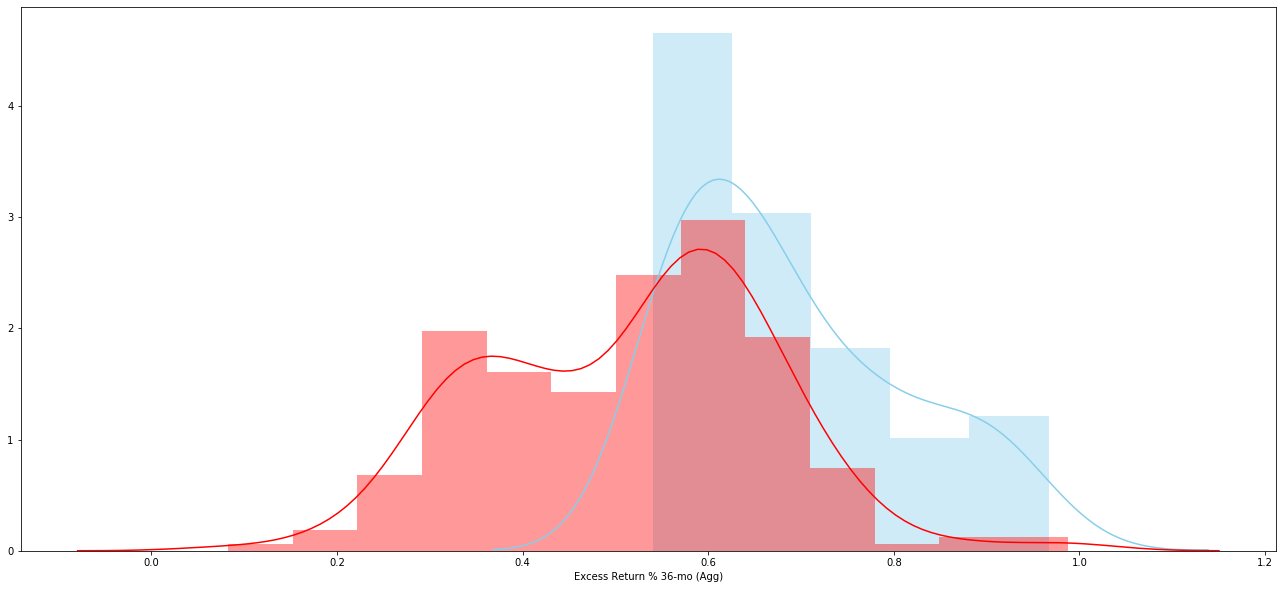

In [60]:
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")